In [ ]:
#Import all the required libraries
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

In [ ]:
#Define start day to fetch the dataset from the yahoo finance library
START = "2010-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [ ]:
data = load_data('TCS.NS')
df=data
df.head()


[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,377.399994,379.450012,374.524994,375.825012,284.037262,1963682
1,2010-01-05,377.500000,379.774994,373.274994,375.924988,284.112823,2014488
2,2010-01-06,375.924988,376.100006,366.500000,367.424988,277.688873,3349176
3,2010-01-07,367.750000,369.700012,355.500000,357.200012,269.961243,6474892
4,2010-01-08,358.000000,359.250000,348.250000,349.899994,264.444031,6048178


In [ ]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,377.399994,379.450012,374.524994,375.825012,1963682
1,377.500000,379.774994,373.274994,375.924988,2014488
2,375.924988,376.100006,366.500000,367.424988,3349176
3,367.750000,369.700012,355.500000,357.200012,6474892
4,358.000000,359.250000,348.250000,349.899994,6048178


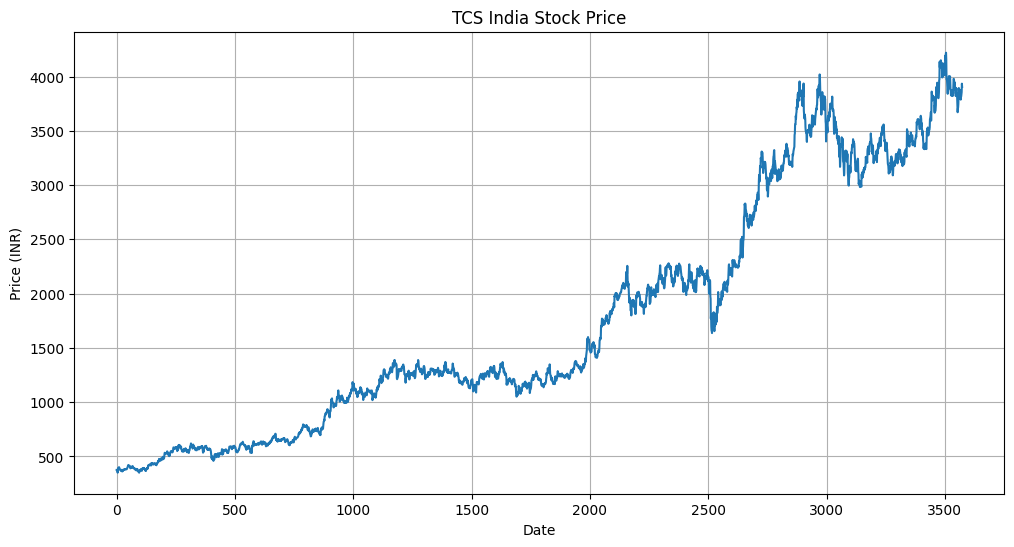

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title("TCS India Stock Price")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()

In [ ]:
df

,Open,High,Low,Close,Volume
0,377.399994,379.450012,374.524994,375.825012,1963682
1,377.500000,379.774994,373.274994,375.924988,2014488
2,375.924988,376.100006,366.500000,367.424988,3349176
3,367.750000,369.700012,355.500000,357.200012,6474892
4,358.000000,359.250000,348.250000,349.899994,6048178
...,...,...,...,...,...
3569,3808.750000,3857.000000,3791.300049,3816.800049,1702154
3570,3817.000000,3847.649902,3792.899902,3838.449951,1338808
3571,3844.500000,3866.949951,3841.000000,3855.850098,1639845
3572,3831.000000,3942.000000,3818.100098,3934.149902,4526556


In [ ]:
ma100 = df.Close.rolling(100).mean()
ma100

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
3569    3938.071504
3570    3938.038003
3571    3938.493503
3572    3939.825002
3573    3940.861001
Name: Close, Length: 3574, dtype: float64

Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

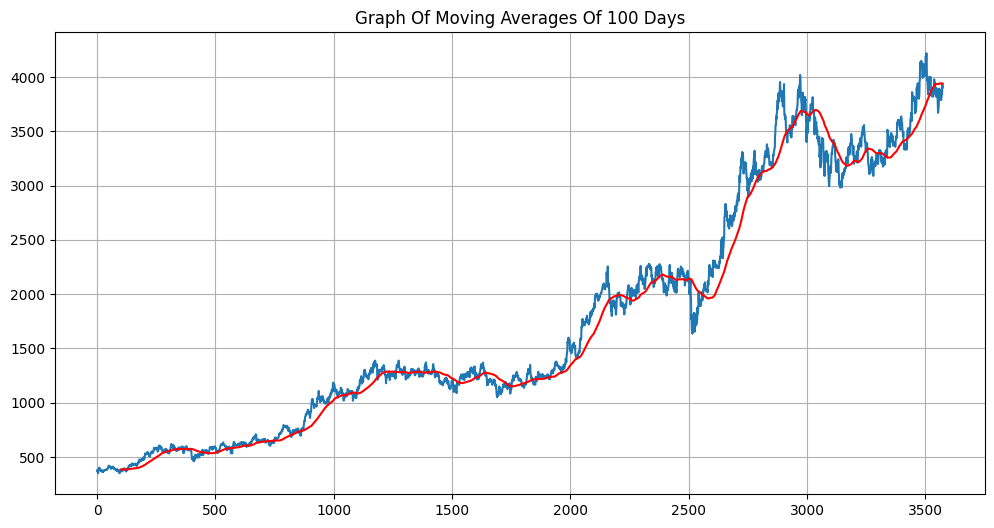

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.grid(True)
plt.title('Graph Of Moving Averages Of 100 Days')

In [ ]:
ma200 = df.Close.rolling(200).mean()
ma200


0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
3569    3756.303003
3570    3758.617502
3571    3761.016003
3572    3763.732003
3573    3766.468752
Name: Close, Length: 3574, dtype: float64

Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

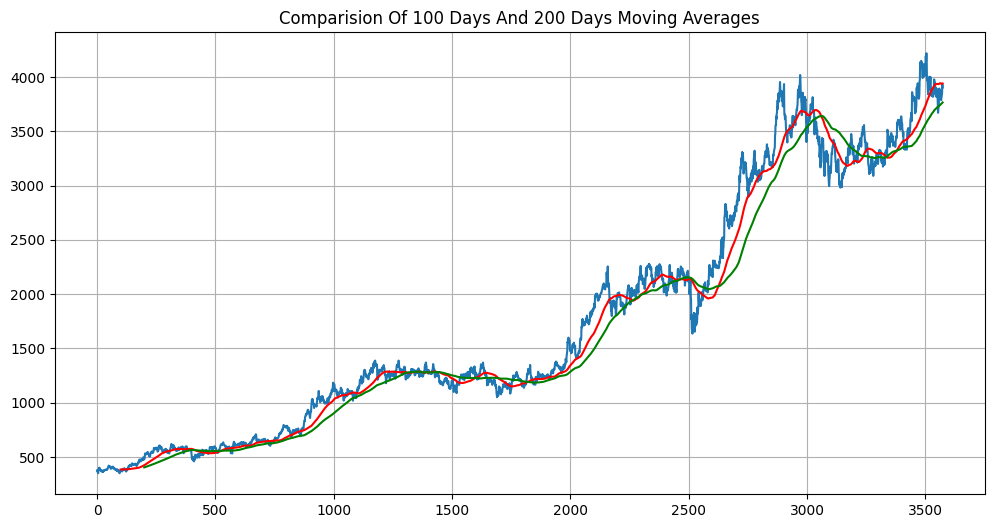

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.grid(True)
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')


In [ ]:
df.shape

(3574, 5)

In [ ]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(2501, 7)
(1073, 7)


In [ ]:
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,377.399994,379.450012,374.524994,375.825012,284.037262,1963682
1,2010-01-05,377.500000,379.774994,373.274994,375.924988,284.112823,2014488
2,2010-01-06,375.924988,376.100006,366.500000,367.424988,277.688873,3349176
3,2010-01-07,367.750000,369.700012,355.500000,357.200012,269.961243,6474892
4,2010-01-08,358.000000,359.250000,348.250000,349.899994,264.444031,6048178


In [ ]:
test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
2501,2020-02-26,2154.000000,2163.899902,2112.949951,2123.600098,1949.016968,2686842
2502,2020-02-27,2119.949951,2119.949951,2086.199951,2105.500000,1932.404663,2349001
2503,2020-02-28,2068.000000,2069.500000,1990.000000,2000.150024,1835.715576,4298076
2504,2020-03-02,2035.000000,2053.949951,1985.699951,2001.300049,1836.771118,2667076
2505,2020-03-03,2020.000000,2060.000000,2012.000000,2036.199951,1868.802124,2757585


In [ ]:
#Using MinMax scaler for normalization of the dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [ ]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.01351019],
       [0.01356204],
       [0.00915373],
       ...,
       [0.93716862],
       [0.91567163],
       [0.93683143]])

In [ ]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train.shape

(2401, 100, 1)

In [ ]:
#ML Model (LSTM)
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential


In [ ]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [ ]:
# Training the model
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 100)

Epoch 1/100
76/76 [==============================] - 35s 324ms/step - loss: 0.0316 - mean_absolute_error: 0.1172
Epoch 2/100
76/76 [==============================] - 25s 333ms/step - loss: 0.0077 - mean_absolute_error: 0.0599
Epoch 3/100
76/76 [==============================] - 24s 318ms/step - loss: 0.0067 - mean_absolute_error: 0.0570
Epoch 4/100
76/76 [==============================] - 26s 340ms/step - loss: 0.0065 - mean_absolute_error: 0.0563
Epoch 5/100
76/76 [==============================] - 25s 325ms/step - loss: 0.0054 - mean_absolute_error: 0.0514
Epoch 6/100
76/76 [==============================] - 26s 342ms/step - loss: 0.0054 - mean_absolute_error: 0.0520
Epoch 7/100
76/76 [==============================] - 26s 345ms/step - loss: 0.0054 - mean_absolute_error: 0.0501
Epoch 8/100
76/76 [==============================] - 23s 305ms/step - loss: 0.0048 - mean_absolute_error: 0.0483
Epoch 9/100
76/76 [==============================] - 25s 326ms/step - loss: 0.0050 - mean_absolu

In [ ]:
model.save('keras_model.keras')



In [ ]:
test_close.shape

(1073, 1)

In [ ]:
past_100_days = pd.DataFrame(train_close[-100:])

In [ ]:
test_df = pd.DataFrame(test_close)

In [ ]:
final_df = pd.concat([past_100_days, test_df], ignore_index=True)



In [ ]:
final_df.head()

,0
0,2059.949951
1,2060.250000
2,2079.350098
3,2047.699951
4,2020.099976


In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.16400169],
       [0.16411786],
       [0.17151269],
       ...,
       [0.85930547],
       [0.88962016],
       [0.87800531]])

In [ ]:
input_data.shape

(1173, 1)

In [ ]:
#Testing the model

x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1073, 100, 1)
(1073,)


In [ ]:
#Making prediction and plotting the graph of predicted vs actual values

# Making predictions

y_pred = model.predict(x_test)


34/34 [==============================] - 5s 115ms/step


In [ ]:
y_pred.shape

(1073, 1)

In [ ]:
y_test

array([0.18864459, 0.18163693, 0.14084945, ..., 0.85930547, 0.88962016,
       0.87800531])

In [ ]:
y_pred

array([[0.25035253],
       [0.25090078],
       [0.25020468],
       ...,
       [0.8268228 ],
       [0.8290771 ],
       [0.8356612 ]], dtype=float32)

In [ ]:
scaler.scale_

array([0.00038716])

In [ ]:
scale_factor = 1/0.00041967
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

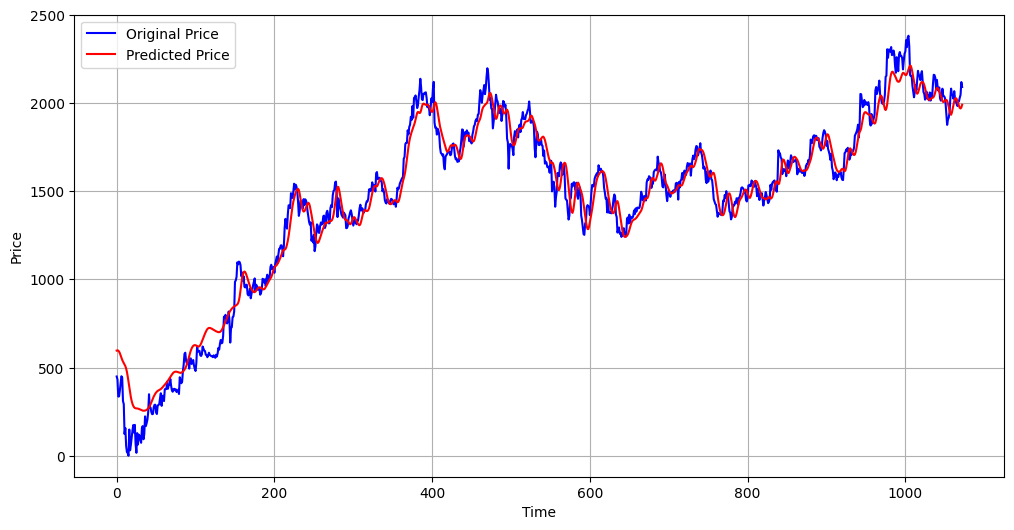

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

Model evaluation


Calculation of mean absolute error

In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

Mean absolute error on test set: 4.63%


Calculation of R2 score

In [ ]:
from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.9698516894436265


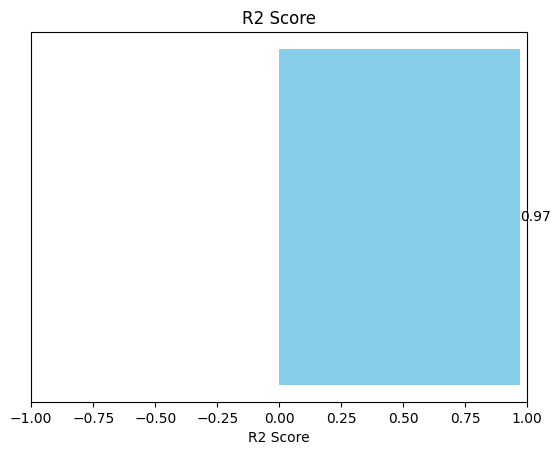

In [ ]:
# Plotting the R2 score
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')

# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')

plt.show()


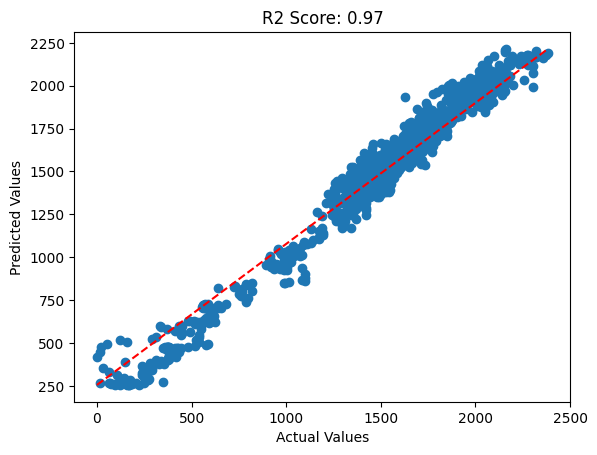

In [ ]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()